# <center>Deep Learning - Neural Networks - Introductive</center> 

The goal of this 'introductive' assignment is to compute various metrics and compare the algorithms of Nearest Neighbor, 3-Nearest Neighbors and Nearest Centroid on the analysis of the MNIST database of handwritten digits.

### <center>Importing Needed Libraries</center>

In [1]:
from sklearn import neighbors, metrics
import struct
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline 

### <center>Function to read the files of idx format</center>

Just a function to read the binary idx file of format
[offset] [type] [value] [description], as mentioned in the source site of the database.

In [2]:
def read_idx_file(file_to_read):
    with open(file_to_read, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype = np.uint8).reshape(shape)

### <center>Importing and Reshaping the MNIST database</center>

Reshaping the imported data from a three dimensional (60000, 28, 28) array to a two dimensional (60000, 28*28) one. 

In [3]:
training_raw = read_idx_file("train-images.idx3-ubyte")
training_data = np.reshape(training_raw, (60000, 28*28))
training_label = read_idx_file("train-labels.idx1-ubyte")
testing_raw = read_idx_file("t10k-images.idx3-ubyte")
testing_data = np.reshape(testing_raw, (10000, 28*28))
testing_labels = read_idx_file("t10k-labels.idx1-ubyte")

### <center>Nearest Neigbor</center>

In [4]:
# Training Sequence
start = time.time()
nn = neighbors.KNeighborsClassifier(n_neighbors = 1, algorithm = 'auto').fit(training_data, training_label)
end = time.time()
print("Nearest Neighbor training finished. Duration:", end - start, "seconds")

Nearest Neighbor training finished. Duration: 16.95538830757141 seconds


In [5]:
# Testing Sequence
nn_y_true_values = testing_labels
start = time.time()
nn_predicted_ys = nn.predict(testing_data)
end = time.time()
print("Nearest Neighbor testing finished. Duration:", end - start, "seconds")

Nearest Neighbor testing finished. Duration: 966.8041219711304 seconds


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



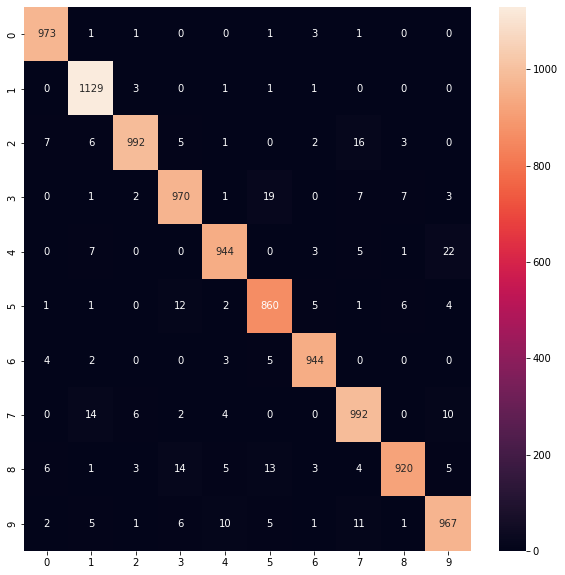

In [6]:
# Report Sequence
nn_report = metrics.classification_report(nn_y_true_values, nn_predicted_ys)
print(nn_report)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(metrics.confusion_matrix(nn_y_true_values, nn_predicted_ys), annot = True, fmt = 'd', ax = ax)
plt.savefig('nn_confusion_matrix.jpg')

### <center>3-Nearest Neighbors</center>

In [7]:
# Training Sequence
start = time.time()
three_nn = neighbors.KNeighborsClassifier(n_neighbors = 3, algorithm = 'auto').fit(training_data, training_label)
end = time.time()
print("Three Nearest Neighbors training finished. Duration:", end - start, "seconds")

Three Nearest Neighbors training finished. Duration: 16.391957759857178 seconds


In [8]:
# Testing Sequence
three_nn_y_true_values = testing_labels
start = time.time()
three_nn_predicted_ys = three_nn.predict(testing_data)
end = time.time()
print("Three Nearest Neighbors testing finished. Duration:", end - start, "seconds")

Three Nearest Neighbors testing finished. Duration: 966.0856721401215 seconds


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



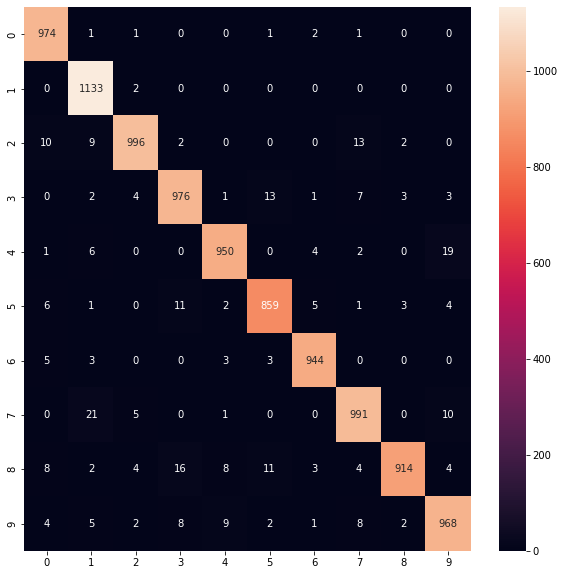

In [9]:
# Report Sequence
three_nn_report = metrics.classification_report(three_nn_y_true_values, three_nn_predicted_ys)
print(three_nn_report)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(metrics.confusion_matrix(three_nn_y_true_values, three_nn_predicted_ys), annot = True, fmt = 'd', ax = ax)
plt.savefig('three_nn_confusion_matrix.jpg')

### <center>Nearest Centroid</center>

In [10]:
# Training Sequence
start = time.time()
nc = neighbors.NearestCentroid().fit(training_data, training_label)
end = time.time()
print("Nearest Centroid training finished. Duration:", end - start, "seconds")

Nearest Centroid training finished. Duration: 0.07252001762390137 seconds


In [11]:
# Testing Sequence
nc_y_true_values = testing_labels
start = time.time()
nc_predicted_ys = nc.predict(testing_data)
end = time.time()
print("Nearest Centroid testing finished. Duration:", end - start, "seconds")

Nearest Centroid testing finished. Duration: 0.05484795570373535 seconds


              precision    recall  f1-score   support

           0       0.91      0.90      0.90       980
           1       0.77      0.96      0.86      1135
           2       0.88      0.76      0.81      1032
           3       0.77      0.81      0.78      1010
           4       0.80      0.83      0.81       982
           5       0.75      0.69      0.72       892
           6       0.88      0.86      0.87       958
           7       0.91      0.83      0.87      1028
           8       0.79      0.74      0.76       974
           9       0.77      0.81      0.79      1009

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



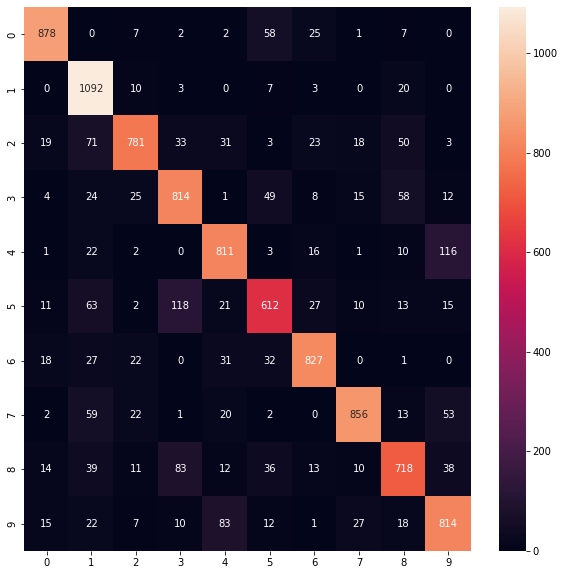

In [12]:
# Report Sequence
nc_report = metrics.classification_report(nc_y_true_values, nc_predicted_ys)
print(nc_report)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(metrics.confusion_matrix(nc_y_true_values, nc_predicted_ys), annot = True, fmt = 'd', ax = ax)
plt.savefig('nc_confusion_matrix.jpg')